# RED NEURONAL - EQUIPO 5

# Profesor: Margarita Orozco Gómez

#Alumno: Jonathan Emmanuel Garacía Hernández
#Matricula: A01423674

#Alumno: Patricio Pérez
#Matricula: A01642110

Noviembre 2023

Otra bibliografía consultada:

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

## Libraries

In [345]:
import pandas as pd
import numpy as np
from google.colab import drive

## Database

In [346]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [347]:
fig_path = "/content/drive/My Drive/Mineria Datos/Datos Bank EQUIPO 5.xlsx"

In [348]:
db = pd.read_excel(fig_path, sheet_name="bank")

In [349]:
db

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
1,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
2,42,admin.,divorced,secondary,no,1811,yes,no,unknown,14,may,150,1,-1,0,unknown,no
3,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
4,32,blue-collar,married,secondary,no,2089,yes,no,cellular,14,nov,132,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
3929,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
3930,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
3931,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Columns selection

In [350]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [351]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

División de las variables tanto en categóricas como en numéricas

In [352]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

OneHotEncoder con esto se puede convertir las variables categórica a formato númerico, se genra una columna binaria por cada categoria.
handle_uknown = 'ingore'
si hay una categoría desconocida se ignora


StandardScaler esla las variables numericas para que la media sea 0 y desviación estándar de 1, todo esto es porque las variables tienen diferentes escalas y con esto se puede mejorar el modelo

In [353]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ]
)

ColumnTransformer de sickit-learn (sklearn) nos ayuda a hacer la transformación anteriormente ddescrita pero en una sola de codigo para todas las variables. Transformers define cuales serán el transformador a usar

In [354]:
x = preprocessor.fit_transform(db)

## Sample splitting

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
y = db['y'].map({'yes':1,'no':0})

In [357]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

## Model_1 LeakyReLU

In [358]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

In [359]:
model_LReLu = Sequential()
model_LReLu.add(Dense(20, input_shape=(x_train.shape[1],)))
model_LReLu.add(LeakyReLU(alpha=0.01))
model_LReLu.add(Dense(1,activation='sigmoid'))

Descripcion del modelo.



Sequential es un modelo lineal

Dense son las capas de red neuronal regular densamente conectada. Las neuronas de esta capa se conectan a cada neurona de la capa anterior. En este caso el modelo utilizó 10 neuronas y es por medio de ReLU (Rectified Linear Unit). ReLU transforma valores negativos a cero. El tensor de entrada es la variable x_train

Añade una segunda capa dense que es la salida modelo (como y es una variable dicotomica pues solo se oucpa una capa) en ese es el caso de sigmoid. Sigmoid es un clasificador que se defina por la probabilidad del valor

In [360]:
model_LReLu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

en esta linea se compila el modlo, se configura un proceso de aprendizaje

optimizer = 'adam'se usa en lugar

### Model trainning

In [361]:
model_LReLu.fit(x_train, y_train, epochs=10, batch_size=40)

Epoch 1/10
79/79 [==============================] - 1s 2ms/step - loss: 0.4700 - accuracy: 0.7991
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8868
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8865
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8919
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8954
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.8980
Epoch 7/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9021
Epoch 8/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9053
Epoch 9/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9062
Epoch 10/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9072


### Model evaluation

In [362]:
loss, accuracy = model_LReLu.evaluate(x_test, y_test)
print(f'loss: {loss}, Accuracy: {accuracy}')

25/25 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9034
loss: 0.2348807454109192, Accuracy: 0.9034307599067688


### Prediction

In [363]:
y_pred = model_LReLu.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

25/25 [==============================] - 0s 1ms/step


In [364]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [365]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[679,  17],
       [ 59,  32]])

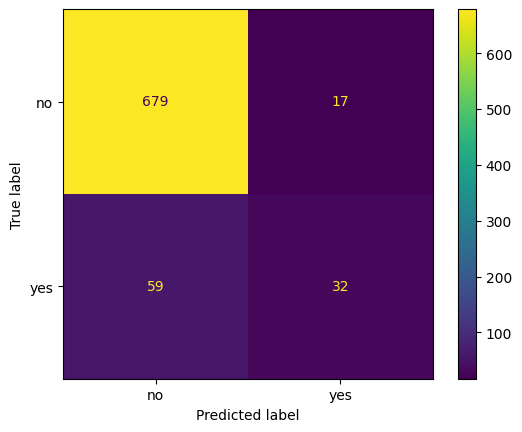

In [366]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=np.unique(db['y']))
disp.plot()
plt.show()

## Model_2 ReLU

In [384]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

In [385]:
model = Sequential() #contenedor de apar que se agregaran (lineales como anteriormente se explicó)
model.add(Dense(80, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1,activation='sigmoid'))

Descripcion del modelo.



Sequential es un modelo lineal

Dense son las capas de red neuronal regular densamente conectada. Las neuronas de esta capa se conectan a cada neurona de la capa anterior. En este caso el modelo utilizó 10 neuronas y es por medio de ReLU (Rectified Linear Unit). ReLU transforma valores negativos a cero. El tensor de entrada es la variable x_train

Añade una segunda capa dense que es la salida modelo (como y es una variable dicotomica pues solo se oucpa una capa) en ese es el caso de sigmoid. Sigmoid es un clasificador que se defina por la probabilidad del valor

In [386]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

en esta linea se compila el modlo, se configura un proceso de aprendizaje

optimizer = 'adam'se usa en lugar

### Model trainning

In [387]:
model.fit(x_train, y_train, epochs=10, batch_size=40)

Epoch 1/10
79/79 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8821
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.8856
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.8989
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9024
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9031
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9056
Epoch 7/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9075
Epoch 8/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9107
Epoch 9/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.9113
Epoch 10/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9126


### Model evaluation

In [388]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'loss: {loss}, Accuracy: {accuracy}')

25/25 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9034
loss: 0.22760795056819916, Accuracy: 0.9034307599067688


### Prediction

In [389]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

25/25 [==============================] - 0s 1ms/step


In [390]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [391]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[666,  30],
       [ 46,  45]])

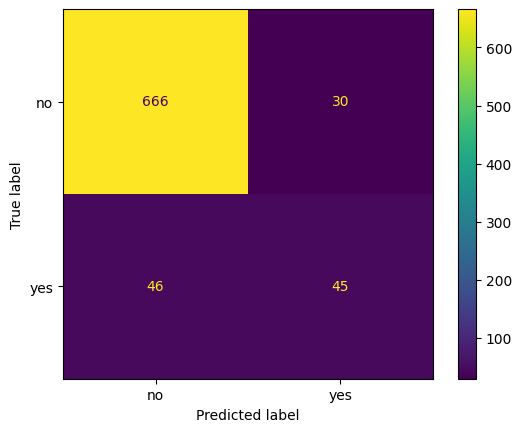

In [392]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=np.unique(db['y']))
disp.plot()
plt.show()

## Model_3 BatchNormalization

In [393]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization
from sklearn.model_selection import StratifiedKFold

In [394]:
model_3 = Sequential()
model_3.add(Dense(100, activation='tanh', input_shape=(x_train.shape[1],)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.40))
model_3.add(Dense(50, activation='tanh'))
model_3.add(Dense(1,activation='sigmoid'))
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Model trainning

In [395]:
model_3.fit(x_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
7/7 [==============================] - 1s 7ms/step - loss: 0.7235 - accuracy: 0.5652
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.6812
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5588 - accuracy: 0.7409
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5181 - accuracy: 0.7759
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4866 - accuracy: 0.7902
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4518 - accuracy: 0.8195
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4173 - accuracy: 0.8388
Epoch 8/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3822 - accuracy: 0.8589
Epoch 9/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3634 - accuracy: 0.8601
Epoch 10/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.8725


### Model evaluation

In [396]:
loss, accuracy = model_3.evaluate(x_test, y_test)
print(f'loss: {loss}, Accuracy: {accuracy}')

25/25 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.8983
loss: 0.280057817697525, Accuracy: 0.8983481526374817


### Prediction

In [397]:
y_pred = model_3.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

25/25 [==============================] - 0s 2ms/step


In [398]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [399]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[685,  11],
       [ 69,  22]])

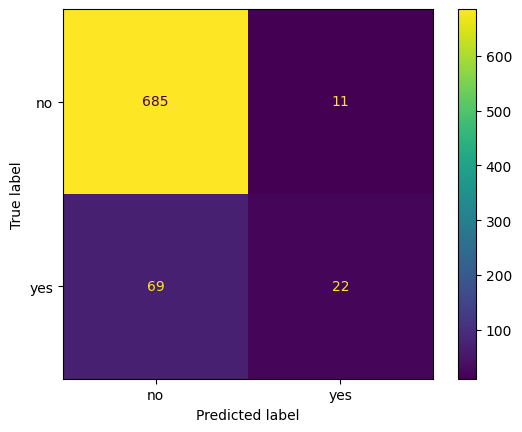

In [400]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=np.unique(db['y']))
disp.plot()
plt.show()